# Neural Networks: A closer look at the ReLU activation Function

Activation functions play a fundamental role in neural networks by introducing non-linearity to the model. They serve as decision-making tools, determining whether a neuron should be activated or not based on the input it receives. This non-linear transformation is crucial for enabling neural networks to learn complex patterns and relationships within data, ultimately enhancing their predictive power and performance.

The introduction of non-linearity through activation functions is crucial for enabling neural networks to model complex, non-linear relationships in data. Without non-linear activation functions, neural networks would be limited to representing linear transformations of the input data, severely restricting their expressive power and ability to capture real-world phenomena. By introducing non-linearity, activation functions enable neural networks to approximate highly non-linear functions, making them powerful tools for tasks such as image recognition, natural language processing, and predictive analytics.

Neural networks create complex features (feature extraction) based on patterns in the data until it reaches the output layer. When it comes time to make a prediction, the output layer linearly combines these features to make a prediction. This is where the activation functions come in. They introduce non-linearity to the model, allowing it to learn complex patterns and relationships in the data. But how does the ReLU activation function achieve this? It turns out that the output layer can also be thought of as a combination of simple non-linear functions, which are then combined linearly to make a prediction. This is where the ReLU activation function comes in. We project our data onto the prediction space, and then apply the ReLU activation function to introduce non-linearity. This allows the model to learn patterns and relationships in the data that would be impossible to capture with a linear model.

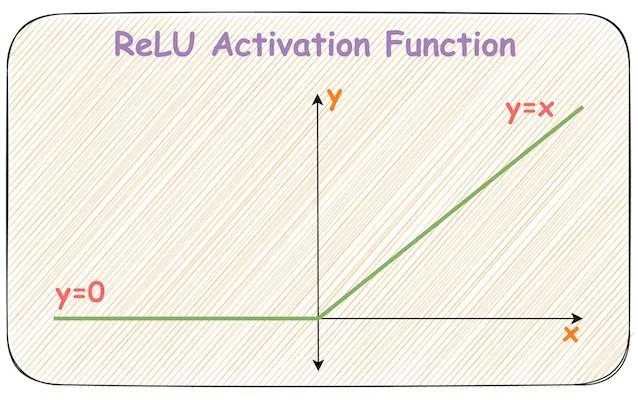

References:

[What Makes ReLU a Non-linear Activation Function](https://blog.dailydoseofds.com/p/a-visual-and-intuitive-guide-to-what)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Universal Function Approximation

The Universal Function Approximation Theorem states that a neural network with a single hidden layer containing a finite number of neurons (or nodes) can approximate any continuous function on a compact input domain to any desired precision, provided that the network has enough neurons. This theorem is fundamental in understanding the representational power of neural networks.

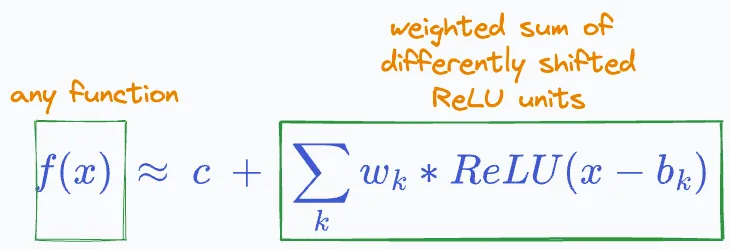

The above illustrations depict that we can potentially add more and more ReLU terms, each shifted and multiplied by some constant to get any shape of the curve, linear or non-linear.

The above equation has no restriction on the nature of the curve; it may be linear or non-linear.

The task is to find those specific weights (w₁, w₂, …, wₙ) which closely estimate the function f(x).

Theoretically, the precision of approximation can be entirely perfect if we add a ReLU term for each possible value of x.



# A Look At a Single-Layered Neural Network



All of the combinations before the last hidden layer can be thought of as feature engineering, the final layer is where the magic happens. The final layer is where the model learns to approximate the function that maps the input to the output.

If we look at the math, we see that the forward pass can be written as: y = W * x + b -> X + h which is similar to the ReLu function

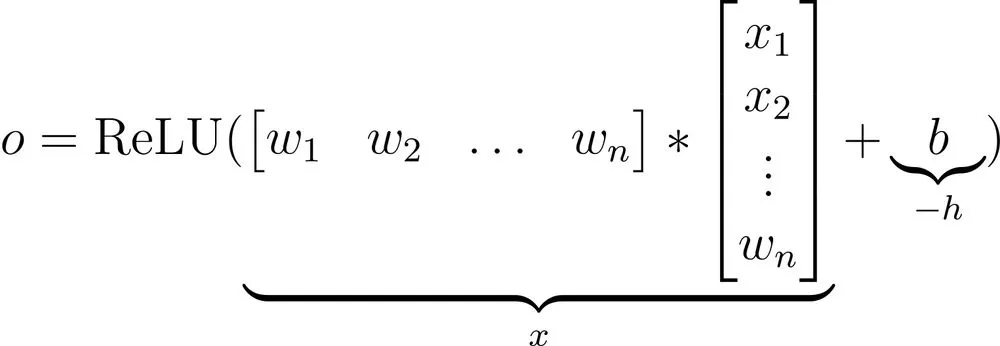

Notice that changing the value for h, will only shift the discontinuity of the ReLU function left or right.

# Let see it in code:

ReLU gives is the typical piecewise function that is linear for x > 0 and 0 for x < 0.

However, if we were to add a paramter h to the ReLU function, we can shift the function to the right by h units.

ReLU Shifted is essentionally the same as ReLU but shifted by h units to the right.

Ignore the "-h" and make it "+h" to shift the ReLU function to the right by h units.

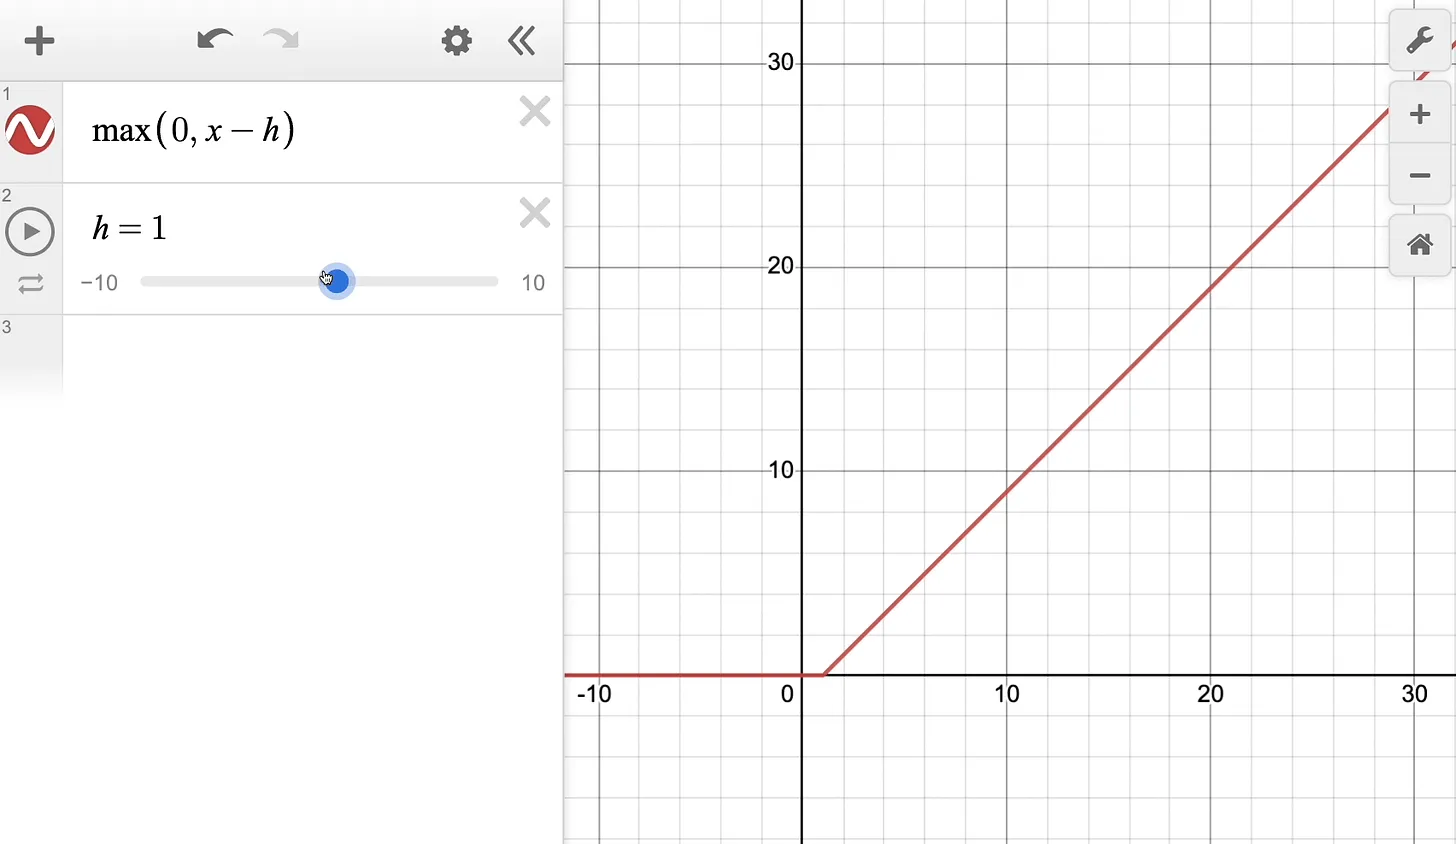

In [ ]:
# Define the ReLU activation function
def relu(x):
    return torch.max(torch.tensor(0.0), x)

In [ ]:
def relu_shifted(x, h):
    return torch.max(torch.tensor(0.0), x + h)

In [ ]:
x = torch.arange(-10, 11, 1)
h = -2.0
w = torch.ones(x.size())
b = torch.ones(x.size()) * 0.0

In [ ]:
output = relu(w * x + b)

plt.plot(x, output)
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.title('ReLU activation function')
plt.grid()
plt.show()

In [ ]:
output_shifted1 = relu_shifted(w * x + b, h)

plt.plot(x, output_shifted1)
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.title('ReLU activation function')
plt.grid()
plt.show()

In [ ]:
# In this case h has the same effect as the bias b
output_shifted2 = relu(w * x + b + h)

plt.plot(x, output_shifted2)
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.title('ReLU activation function')
plt.grid()
plt.show()

# Understanding final Hidden Layer

We mentioned that all layers before the final layer are feature engineering. The final output can be thought of a sequence of ReLU functions that are shifted to the right by the value of the bias term to approximate the function that maps the input to the output.

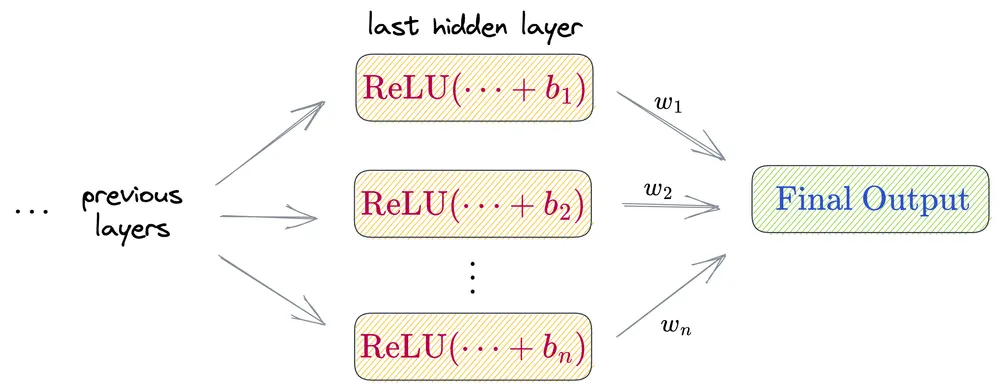

As we add more neurons to the last hidden layer, we are adding more ReLU functions that are shifted to the right by the value of the bias term. This allows the model to approximate more complex functions. We see below that the more neurons we add, more ability the model has to approximate curves.

In [ ]:
w_hidden_state = torch.tensor([1.0, 1.0, -3.0])
b_hidden_state = torch.tensor([0.0, -2.0, -3.0])

In [ ]:
output1 = (
    w_hidden_state[0] * relu(x + b_hidden_state[0])
)
plt.plot(x, output1)
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.title('ReLU activation function')
plt.grid()
plt.show()

In [ ]:
output2 = (
    w_hidden_state[0] * relu(x + b_hidden_state[0]) + 
    w_hidden_state[1] * relu( x + b_hidden_state[1])
)
plt.plot(x, output2)
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.title('ReLU activation function')
plt.grid()
plt.show()

In [ ]:
output3 = (
    w_hidden_state[0] * relu(x + b_hidden_state[0]) + 
    w_hidden_state[1] * relu(x + b_hidden_state[1]) + 
    w_hidden_state[2] * relu(x + b_hidden_state[2])
)
plt.plot(x, output3)
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.title('ReLU activation function')
plt.grid()
plt.show()

# Function Modeling

Let's consider modeling a simple function f(x) = x² using a neural network with ReLU activation functions.

In [ ]:
y = x ** 2

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = x^2')
plt.grid()
plt.show()

In [ ]:
w_hidden_state = torch.tensor([2.8, -2.1, 2.0, -2.2])
b_hidden_state = torch.tensor([-2.85, -3.09, -5.63, -4.58])

w_inference = torch.tensor([1.9, 2.3, 3.1, 2.5])
b_inference = torch.tensor([-1.0])

## One ReLU neuron

We see that by using a single ReLU neuron, we get the typical ReLU function, shifted to the right by the bias_inference term and scaled by the weight_inference term.

Overall this sucks at approximating the function f(x) = x².

In [ ]:
output_inference1 = (
    w_inference[0] * relu(x * w_hidden_state[0] + b_hidden_state[0])
) + b_inference

plt.plot(x, y, label='y = x^2 with One ReLU Activation', color='black', linestyle='--')
plt.plot(x, output_inference1, label='Single ReLU Node', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = x^2')
plt.legend()

# Two ReLU neurons

When we add a second ReLU Neuron to the model, we are allowed to as inflection points to the original ReLU curve. This allows us to approximate the function f(x) = x² better.

In [ ]:
output_inference2 = (
    w_inference[0] * relu(x * w_hidden_state[0] + b_hidden_state[0]) +
    w_inference[1] * relu(x * w_hidden_state[1] + b_hidden_state[1])
) + b_inference

plt.plot(x, y, label='y = x^2 with Twp ReLU Activations', color='black', linestyle='--')
plt.plot(x, output_inference2, label='Two ReLU Nodes', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = x^2')
plt.legend()
plt.show()

# Three ReLU neurons

When we add a third ReLU Neuron to the model, we add an additional inflection point to the original ReLU curve. This allows us to approximate the function f(x) = x² even better on the right side of the curve.

In [ ]:
output_inference3 = (
    w_inference[0] * relu(x * w_hidden_state[0] + b_hidden_state[0]) +
    w_inference[1] * relu(x * w_hidden_state[1] + b_hidden_state[1]) +
    w_inference[2] * relu(x * w_hidden_state[2] + b_hidden_state[2])
) + b_inference

plt.plot(x, y, label='y = x^2 with Three ReLU Activations', color='black', linestyle='--')
plt.plot(x, output_inference3, label='Three ReLU Nodes', color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = x^2')
plt.legend()
plt.show()

In [ ]:
output_inference4 = (
    w_inference[0] * relu(x * w_hidden_state[0] + b_hidden_state[0]) +
    w_inference[1] * relu(x * w_hidden_state[1] + b_hidden_state[1]) +
    w_inference[2] * relu(x * w_hidden_state[2] + b_hidden_state[2]) +
    w_inference[3] * relu(x * w_hidden_state[3] + b_hidden_state[3])
) + b_inference

plt.plot(x, y, label='y = x^2 with Four ReLU Activations', color='black', linestyle='--')
plt.plot(x, output_inference4, label='Four ReLU Nodes', color='purple')
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = x^2')
plt.legend()
plt.show()

# Let's see the progression in a single plot

In [ ]:
# Plot the 4 plots together
plt.plot(x, y, label='y = x^2', color='black', linestyle='--')
plt.plot(x, output_inference1, label='Single ReLU Node', color='red')
plt.plot(x, output_inference2, label='Two ReLU Nodes', color='blue')
plt.plot(x, output_inference3, label='Three ReLU Nodes', color='green')
plt.plot(x, output_inference4, label='Four ReLU Nodes', color='purple')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Modeling y = x^2 with ReLU Activations')
plt.legend()
plt.show()

In [ ]:
# Make 4 subplots for the 4 models
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].plot(x, y, label='y = x^2', color='black', linestyle='--')
axs[0, 0].plot(x, output_inference1, label='Single ReLU Node', color='red')
axs[0, 0].set_title('Single ReLU Node')
axs[0, 0].legend()

axs[0, 1].plot(x, y, label='y = x^2', color='black', linestyle='--')
axs[0, 1].plot(x, output_inference2, label='Two ReLU Nodes', color='blue')
axs[0, 1].set_title('Two ReLU Nodes')
axs[0, 1].legend()

axs[1, 0].plot(x, y, label='y = x^2', color='black', linestyle='--')
axs[1, 0].plot(x, output_inference3, label='Three ReLU Nodes', color='green')
axs[1, 0].set_title('Three ReLU Nodes')
axs[1, 0].legend()

axs[1, 1].plot(x, y, label='y = x^2', color='black', linestyle='--')
axs[1, 1].plot(x, output_inference4, label='Four ReLU Nodes', color='purple')
axs[1, 1].set_title('Four ReLU Nodes')
axs[1, 1].legend()

plt.show()

# Now let's do it with a neural network

Let's overfit a neural network to the function f(x) = x² using ReLU activation functions. This will give us a really good approximation within the range of the training data.

In [ ]:
x = torch.arange(-10, 11, 1).float()
y = x ** 2

In [ ]:
output_dim = 1
hidden_dim = 64

model = nn.Sequential(
    nn.Linear(1, hidden_dim),
    nn.ReLU(),
    nn.Linear(hidden_dim, output_dim)
)
epochs = 1000
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
for epoch in range(epochs):
    optimizer.zero_grad()
    output = model(x.unsqueeze(1))
    loss = criterion(output, y.unsqueeze(1))
    loss.backward()
    optimizer.step()

In [ ]:
linear1_weight = model[0].weight.detach().numpy()
linear1_bias = model[0].bias.detach().numpy()

linear2_weight = model[2].weight.detach().numpy()
linear2_bias = model[2].bias.detach().numpy()

In [ ]:
y_hat = model(x.unsqueeze(1))

In [ ]:
# print weights and biases
print('Linear 1 weights:', linear1_weight)
print('Linear 1 bias:', linear1_bias)

In [ ]:
# print weights and biases
print('Linear 2 weights:', linear2_weight)
print('Linear 2 bias:', linear2_bias)

In [ ]:
plt.plot(x, y, label='y = x^2', color='black', linestyle='--')
plt.plot(x, y_hat.detach().numpy(), label='Neural Network', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Modeling y = x^2 with 64 ReLU Activations')
plt.legend()
plt.show()